In [1]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical

## Data Preprocessing

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Normalization
x_train = x_train / 255
x_test = x_test / 255

In [5]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [6]:
# One hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

(-0.5, 27.5, 27.5, -0.5)

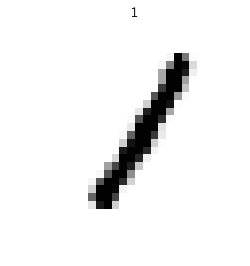

In [7]:
s = np.random.randint(60000)

a = list(y_train[s]).index(1)

plt.imshow(x_train[s][:, :, 0], cmap = 'Greys')
plt.title(a)
plt.axis('off')

## Create CNN Model

In [8]:
CNN_layers = [Conv2D(28, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(156, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(268, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=138, activation='relu'),
             Dense(units=10, activation='softmax')]

In [9]:
model = Sequential(CNN_layers + FC_layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 156)       39468     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 156)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 268)         376540    
_________________________________________________________________
global_average_pooling2d (Gl (None, 268)               0         
_________________________________________________________________
dense (Dense)                (None, 138)               3

## 編譯模型: 設定模型訓練時的設定
* Optimizer: Adam
* Loss: categorical cross-entropy

In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['categorical_accuracy'])

In [11]:
model.layers

In [12]:
model.fit(x_train, y_train, batch_size=150, epochs=3, validation_data=(x_test, y_test) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 327s 5ms/sample - loss: 0.6715 - categorical_accuracy: 0.7814 - val_loss: 0.2249 - val_categorical_accuracy: 0.9323
Epoch 2/3
60000/60000 [==============================] - 303s 5ms/sample - loss: 0.1936 - categorical_accuracy: 0.9414 - val_loss: 0.1356 - val_categorical_accuracy: 0.9576
Epoch 3/3
60000/60000 [==============================] - 352s 6ms/sample - loss: 0.1274 - categorical_accuracy: 0.9612 - val_loss: 0.0993 - val_categorical_accuracy: 0.9686


In [13]:
model.save_weights('CNN_first.h5')

## 模型預測: 預測資料集的準確率¶

In [14]:
model.load_weights('CNN_first.h5')

score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 22s 2ms/sample - loss: 0.0993 - categorical_accuracy: 0.9686
Train Accuracy: 96.71499729156494
Test Accuracy: 96.85999751091003


In [15]:
model.layers

## Transfer Learning

In [16]:
(a_train, b_train), (a_test, b_test) = fashion_mnist.load_data()

In [17]:
a_train.shape

(60000, 28, 28)

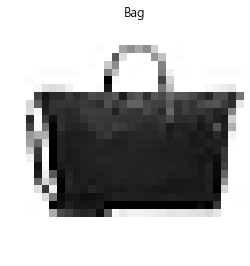

In [22]:
name_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
idx = np.random.randint(a_train.shape[0])
a_sample = a_train[idx]
b_sample = b_train[idx].squeeze()
plt.imshow(a_sample,'Greys')
plt.title(name_list[b_sample])
plt.axis('off');

In [23]:
# Normalization
a_train = a_train.reshape(60000, 28, 28, 1)/255 #色彩範圍為0到255所以要除於255
a_test  = a_test.reshape(10000, 28, 28, 1)/255

In [24]:
# One-hot encoding
b_train = to_categorical(b_train, 10)
b_test = to_categorical(b_test, 10)

### CNN for mnist
CNN_layers = [Conv2D(28, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(156, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(268, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=138, activation='relu'),
             Dense(units=10, activation='softmax')]
             
### CNN for fashion_mnist

* From CNN for mnist

CNN_layers

* New FC layers for fashion_mnist
FC_layers_fashion = [Dense(units=223, activation='relu'),
                   Dense(units=158, activation='relu'),
                   Dense(units=84, activation='selu'),
                   Dense(units=10, activation='softmax')]

## The CNN layers are borrowed from the CNN for mnist model

In [26]:
FC_layers_fashion = [Dense(units=223, activation='relu'),
                   Dense(units=158, activation='relu'),
                   Dense(units=10, activation='softmax')]

In [27]:
model_fashion = Sequential(CNN_layers+FC_layers_fashion)
model_fashion.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 156)       39468     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 156)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 268)         376540    
_________________________________________________________________
global_average_pooling2d (Gl (None, 268)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 223)              

## 遷移學習的訓練方式
* Fine-tune: 新資料集的樣本數夠多，整個模型重新訓練
* Frozen: 當新資料集的樣本數不夠多，凍結借來的部分，只針對新建立的神經網路層訓練

In [28]:
# Frozen
for layer in CNN_layers:
    layer.trainable = False

In [29]:
model_fashion.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 156)       39468     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 156)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 268)         376540    
_________________________________________________________________
global_average_pooling2d (Gl (None, 268)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 223)              

In [30]:
model_fashion.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['categorical_accuracy'])


In [31]:
model_fashion.fit(a_train, b_train, batch_size=300, epochs=10, validation_data=(a_test, b_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 169s 3ms/sample - loss: 0.8729 - categorical_accuracy: 0.6827 - val_loss: 0.6727 - val_categorical_accuracy: 0.7537
Epoch 2/10
60000/60000 [==============================] - 169s 3ms/sample - loss: 0.6372 - categorical_accuracy: 0.7624 - val_loss: 0.6355 - val_categorical_accuracy: 0.7554
Epoch 3/10
60000/60000 [==============================] - 167s 3ms/sample - loss: 0.5769 - categorical_accuracy: 0.7830 - val_loss: 0.5751 - val_categorical_accuracy: 0.7937
Epoch 4/10
60000/60000 [==============================] - 153s 3ms/sample - loss: 0.5383 - categorical_accuracy: 0.8005 - val_loss: 0.5426 - val_categorical_accuracy: 0.8027
Epoch 5/10
60000/60000 [==============================] - 156s 3ms/sample - loss: 0.5152 - categorical_accuracy: 0.8096 - val_loss: 0.5170 - val_categorical_accuracy: 0.8051
Epoch 6/10
60000/60000 [==============================] - 152s 3ms/sample - loss

In [32]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 20s 2ms/sample - loss: 0.0993 - categorical_accuracy: 0.9686
Train Accuracy: 96.71499729156494
Test Accuracy: 96.85999751091003


### Q: Is the borrowed NN be affected? (Frozen situation)
### Ans: No.

In [33]:
# Fine-tune
for layer in CNN_layers:
    layer.trainable = True

In [34]:
model_fashion.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 156)       39468     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 156)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 268)         376540    
_________________________________________________________________
global_average_pooling2d (Gl (None, 268)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 223)              

In [35]:
model_fashion.fit(a_train, b_train, batch_size=400, 
                epochs=5,
                validation_data=(a_test, b_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 163s 3ms/sample - loss: 0.4306 - categorical_accuracy: 0.8409 - val_loss: 0.4597 - val_categorical_accuracy: 0.8287
Epoch 2/5
60000/60000 [==============================] - 147s 2ms/sample - loss: 0.4240 - categorical_accuracy: 0.8435 - val_loss: 0.4686 - val_categorical_accuracy: 0.8262
Epoch 3/5
60000/60000 [==============================] - 171s 3ms/sample - loss: 0.4185 - categorical_accuracy: 0.8447 - val_loss: 0.4521 - val_categorical_accuracy: 0.8375
Epoch 4/5
60000/60000 [==============================] - 176s 3ms/sample - loss: 0.4156 - categorical_accuracy: 0.8447 - val_loss: 0.4428 - val_categorical_accuracy: 0.8376
Epoch 5/5
60000/60000 [==============================] - 184s 3ms/sample - loss: 0.4067 - categorical_accuracy: 0.8501 - val_loss: 0.4496 - val_categorical_accuracy: 0.8361


In [36]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 27s 3ms/sample - loss: 0.0993 - categorical_accuracy: 0.9686
Train Accuracy: 96.71499729156494
Test Accuracy: 96.85999751091003


### Q: Is the borrowed NN be affected? (Fine-tune situation)
### Ans: No